In [1]:
import networkx as nx

In [2]:
graph = nx.DiGraph()

In [3]:
from sympy import symbols, Symbol
from sympy import Eq
v_perp_s, v_para_s = Symbol("v_{\perp, s}"), Symbol("v_{\parallel, s}")
v_perp_e, v_para_e = Symbol("v_{\perp, e}"), Symbol("v_{\parallel, e}")
v_perp_p, v_para_p = Symbol("v_{\perp, p}"), Symbol("v_{\parallel, p}")
v_perp_D, v_para_D = Symbol("v_{\perp, D}"), Symbol("v_{\parallel, D}")
v_perp_T, v_para_T = Symbol("v_{\perp, T}"), Symbol("v_{\parallel, T}")
m_s, Z_s = symbols("m_{s}, Z_{s}")
m_s1, Z_s1 = symbols("m_{s1}, Z_{s1}")
m_s2, Z_s2 = symbols("m_{s2}, Z_{s2}")
r_s1_s2 = Symbol("r_{s1,s2}")
m_e, Z_e = symbols("m_{e}, Z_{e}")
m_p, Z_p = symbols("m_{p}, Z_{p}")
m_D, Z_D = symbols("m_{D}, Z_{D}")
m_T, Z_T = symbols("m_{T}, Z_{T}")
F_Coulomb, B_ext = symbols("F_{Coulomb}, B_{ext}")
e = Symbol("e")
pi, epsilon_0, vacuum_0 = symbols("\pi, \\varepsilon_{0}, \mu_{0}")

In [4]:
# %matplotlib inline

In [5]:
Z_sum = Symbol("Z_{sum}")

In [6]:

F_pp, F_pe, F_ee = symbols("F_{pp}, F_{pe}, F_{ee}")

In [7]:
Coulomb_DAG = nx.DiGraph()

In [8]:
from hifor.graphtool import add_nodes_and_edges_from_Eq
add_nodes_and_edges_from_Eq(Coulomb_DAG, 
    Eq(F_Coulomb, 1/(4*pi*epsilon_0) * (Z_s1 * Z_s2 * e**2 ) / r_s1_s2**2 )) 

In [9]:
from hifor.graphtool import embed_subgraph_into_graph
embed_subgraph_into_graph(Coulomb_DAG, graph, 
    F_pp, {pi:pi, e:e, epsilon_0: epsilon_0, r_s1_s2:r_s1_s2, Z_s1:Z_p, Z_s2:Z_p}) 
embed_subgraph_into_graph(Coulomb_DAG, graph, 
    F_pe, {pi:pi, e:e, epsilon_0: epsilon_0, r_s1_s2:r_s1_s2, Z_s1:Z_p, Z_s2:Z_e}) 
embed_subgraph_into_graph(Coulomb_DAG, graph, 
    F_ee, {pi:pi, e:e, epsilon_0: epsilon_0, r_s1_s2:r_s1_s2, Z_s1:Z_e, Z_s2:Z_e}) 

In [10]:
nx.is_directed_acyclic_graph(graph)

True

In [11]:
from decimal import Decimal, getcontext
from scipy import constants
from sympy import Float
# https://docs.scipy.org/doc/scipy/reference/constants.html
# In Python, float data type is of range 2.22507e-308 to 1.79769e+308 and 64 bits, equivalent to double in other languages.

graph.graph["decimal_context"] = getcontext()
graph.nodes[e]["val"] = {
    "value": Float( constants.value(u'elementary charge')),
    "unit":           constants.unit(u'elementary charge') }
graph.nodes[epsilon_0]["val"] = {
    "value": Float( constants.value(u'vacuum electric permittivity')),
    "unit":           constants.unit(u'vacuum electric permittivity') }
graph.nodes[pi]["val"] = {
    "value": Float( constants.pi),
    "unit":           ""}
graph.nodes[Z_p]["val"] = {
    "value":  1,
    "unit":           ""}
graph.nodes[Z_e]["val"] = {
    "value":  1,
    "unit":           ""}
graph.nodes[r_s1_s2]["val"] = {
    "value":  Float(1e-6),
    "unit":           "m"}

In [12]:
from hifor.calc import calc_value_of_node
calc_value_of_node(graph, F_pp)
calc_value_of_node(graph, F_pe)
calc_value_of_node(graph, F_ee)

2.30707755234174e-16

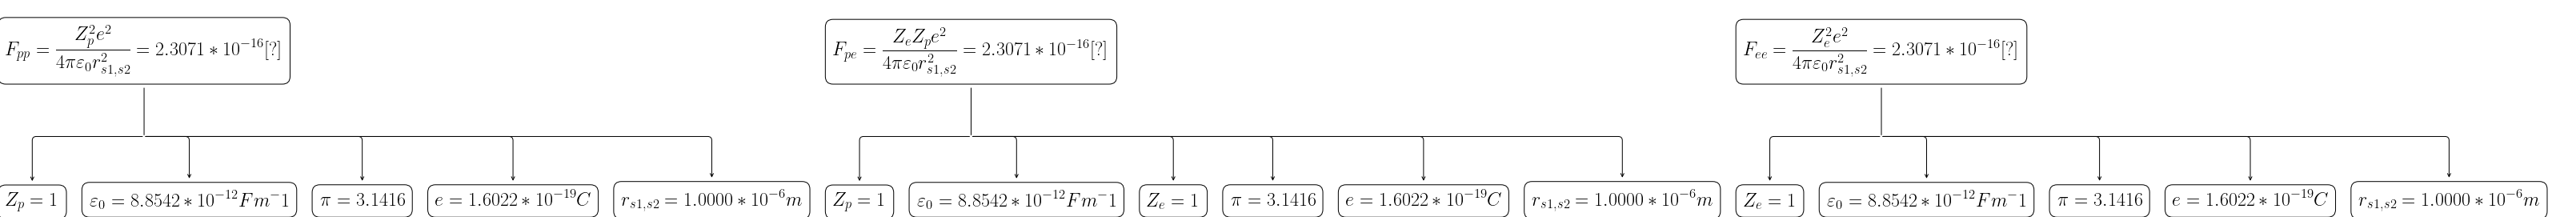

In [13]:
from hifor.draw import draw_hifor

fig, ax = draw_hifor(graph)
fig.savefig("test.png", dpi=600, bbox_inches=0) # bbox_inches=0 from Hooked, StackOverflow, https://stackoverflow.com/a/9295472/12486177

In [14]:
a, b, c = symbols("a, b, c")
expr = a*b*c

In [15]:
expr.evalf({a: Decimal("5e00"), b: Decimal("5e30"), c: Decimal("3e50")}).is_integer

TypeError: int() argument must be a string, a bytes-like object or a number, not 'dict'

In [ ]:
print(expr.is_integer)

In [ ]:
from sympy import Integer
isinstance(a.subs(a, 1), Integer)